<a href="https://colab.research.google.com/github/code-lover636/Intro_Pytorch/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [78]:
class Model(nn.Module):
    # Input layer - 4 features of flower --> Hidden layer 1
    # -->H2 -->output
    def __init__(self, inp_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instantiate nn.Module
        self.fc1 = nn.Linear(inp_features,h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x


In [79]:
# Manual seed for randomisation
torch.manual_seed(32)
model = Model()

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [82]:
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [83]:
# train test and split
X = df.drop('variety', axis=1)
y = df['variety']

X = X.values
y = y.values

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [85]:
# Converting to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [86]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [87]:
# Measure error
criterion = nn.CrossEntropyLoss()
# Adam Optimizer, learning rate (lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [88]:
# Epochs - one run through data
epochs = 100
losses = []
for i in range(epochs):
    # forward and predict
    y_pred = model.forward(X_train)

    # Measure error
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    #print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch {i}: loss = {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0: loss = 1.1699321269989014
Epoch 10: loss = 0.9570867419242859
Epoch 20: loss = 0.7980872392654419
Epoch 30: loss = 0.6327950954437256
Epoch 40: loss = 0.43861740827560425
Epoch 50: loss = 0.2904532551765442
Epoch 60: loss = 0.1778070479631424
Epoch 70: loss = 0.11584124714136124
Epoch 80: loss = 0.08936373889446259
Epoch 90: loss = 0.0775291696190834


Text(0.5, 0, 'Epoch')

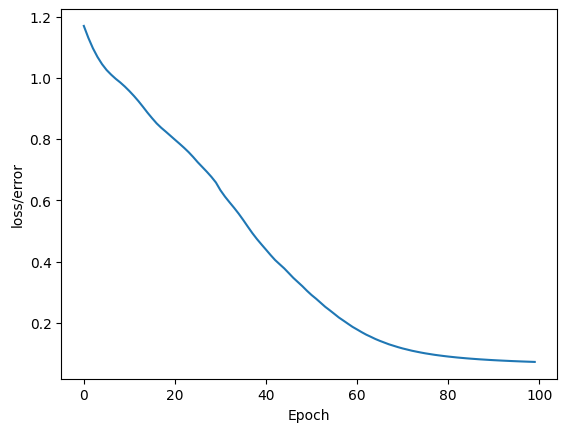

In [89]:
#graph
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [90]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.0538)

In [91]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f"{i+1} {str(y_val)}")

        if y_val.argmax().item() == y_test[i]:
            correct += 1
correct


1 tensor([-3.3646,  3.9392,  0.3720])
2 tensor([  7.5572,   1.1015, -11.3347])
3 tensor([  6.5957,   1.5027, -10.4091])
4 tensor([-3.3331,  4.2594,  0.0623])
5 tensor([-7.3782,  2.8087,  5.1605])
6 tensor([-7.3760,  3.9013,  4.2826])
7 tensor([  6.1971,   1.6470, -10.0047])
8 tensor([  6.6383,   1.4348, -10.4031])
9 tensor([-2.6753,  4.3091, -0.6392])
10 tensor([  7.1875,   1.3812, -11.0965])
11 tensor([-3.8318,  4.4027,  0.5246])
12 tensor([-8.6807,  1.9994,  6.8923])
13 tensor([-2.0678,  3.8200, -0.7571])
14 tensor([-1.0768,  4.3741, -2.2838])
15 tensor([-7.4965,  2.6207,  5.3287])
16 tensor([-8.6136,  1.5508,  7.1186])
17 tensor([-3.7761,  3.6462,  0.9487])
18 tensor([-6.7608,  2.7754,  4.5281])
19 tensor([-1.7048,  4.1980, -1.4670])
20 tensor([  7.7757,   1.3740, -11.8864])
21 tensor([  6.8811,   1.5887, -10.8763])
22 tensor([-9.4350,  2.7012,  7.2406])
23 tensor([-5.7694,  3.0131,  3.3490])
24 tensor([  6.7561,   1.3467, -10.4799])
25 tensor([  6.7959,   1.0626, -10.2672])
26 tens

30

In [92]:
new = torch.tensor([1.2,4.8,3.3,9.2])

In [96]:
with torch.no_grad():
    y_eval = model(new)
    print(f"{str(y_eval)}")

tensor([-12.5687,  -2.3979,  13.3239])
